# Looking into the Most Frequent Crime in San Francisco 

## Inputing the crime data 

In [24]:
%matplotlib inline
import pandas as pd
incidents = pd.read_csv('sanfrancisco_incidents_summer_2014.csv')

In [12]:
#just a brief view of the data
incidents.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,140734311,ARSON,ARSON OF A VEHICLE,Sunday,08/31/2014,23:50,BAYVIEW,NONE,LOOMIS ST / INDUSTRIAL ST,-122.405647,37.738322,"(37.7383221869053, -122.405646994567)",14073431126031
1,140736317,NON-CRIMINAL,LOST PROPERTY,Sunday,08/31/2014,23:45,MISSION,NONE,400 Block of CASTRO ST,-122.435012,37.761768,"(37.7617677182954, -122.435012093789)",14073631771000
2,146177923,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014,23:30,SOUTHERN,NONE,1000 Block of MISSION ST,-122.409795,37.780036,"(37.7800356268394, -122.409795194505)",14617792306244
3,146177531,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014,23:30,RICHMOND,NONE,FULTON ST / 26TH AV,-122.485263,37.772518,"(37.7725176473142, -122.485262988324)",14617753106244
4,140734220,NON-CRIMINAL,FOUND PROPERTY,Sunday,08/31/2014,23:23,RICHMOND,NONE,800 Block of LA PLAYA ST,-122.509895,37.772313,"(37.7723131976814, -122.509895418239)",14073422072000


## What's the most frequent crime?

In [21]:
incidents['Descript'].value_counts()[:5]

GRAND THEFT FROM LOCKED AUTO    3766
STOLEN AUTOMOBILE               1350
LOST PROPERTY                   1202
PETTY THEFT OF PROPERTY         1125
WARRANT ARREST                   980
Name: Descript, dtype: int64

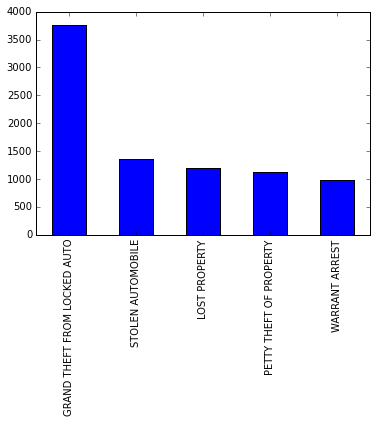

In [25]:
incidents['Descript'].value_counts()[:5].plot(kind='bar')

In [107]:
occur_rate_grand_theft = len(incidents[incidents['Descript'] == "GRAND THEFT FROM LOCKED AUTO"]) / len(incidents)
print("#Grand theft from locked auto: ", len(incidents[incidents['Descript'] == "GRAND THEFT FROM LOCKED AUTO"]))
print("#Title incidents:", len(incidents))
print("occur_rate:", occur_rate_grand_theft)

#Grand theft from locked auto:  3766
#Title incidents: 28993
occur_rate: 0.12989342255027075


As we can see in the above easy summary, 
the crime incidents "GRAND THEFT FROM LOCKED AUTO" is the most frequent crime(3766), which account for nearly 13% of the total crime(28993).
And we will look into it in more details.

## When did the crime occur?

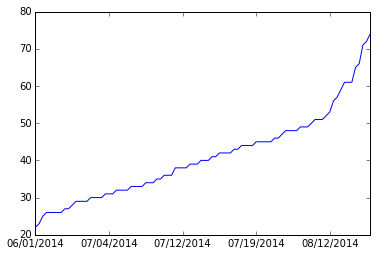

In [130]:
theft = incidents[incidents['Descript'] == 'GRAND THEFT FROM LOCKED AUTO']
theft['Date'].value_counts(ascending=True).plot()

It's very clear that as time go by, the number of incidents for theft on the locked auto has increased. And we will inspect this by months later.

## See exactly how many incidents occured by months 

In [136]:
#self-defined function to parse the date for further usage
def get_month(date):
    month = date[:2]
    if month == '06':
        return 'June'
    elif month == '07':
        return 'July'
    elif month == '08':
        return 'August'

In [137]:
pd.options.mode.chained_assignment = None  # default='warn'
theft['Month'] = theft['Date'].apply(lambda x: get_month(x))

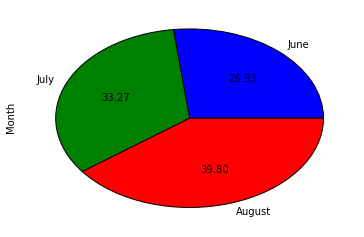

In [161]:
(theft['Month'].value_counts() / len(theft)).sort_values(ascending=True).plot(kind='pie', autopct='%.2f')

The number of incidents in the August accounts for almost 40% of the grand theft on locked auto.

## How about different day of weeks?

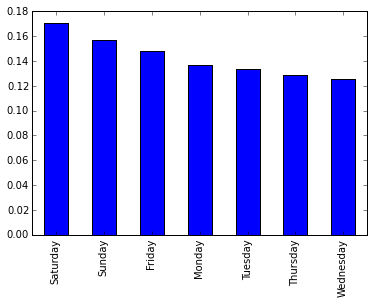

In [163]:
(theft['DayOfWeek'].value_counts() / len(theft)).plot(kind='bar')

Not too surprised, the days which criminals choose to "work" are on the Saturaday and Sunday, which many people may be day off and are relaxing at their homes.

## How different month affect the crime on the weekend?

In [166]:
is_June = theft['Month'] == "June"
is_July = theft['Month'] == "July"
is_August = theft['Month'] == "August"
is_Sun = theft['DayOfWeek'] == "Sunday"
is_Sat = theft['DayOfWeek'] == "Saturday"

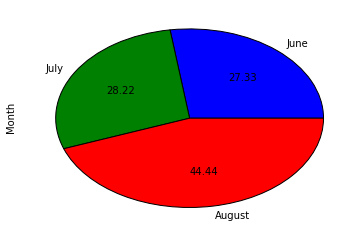

In [164]:
(theft[is_Sun | is_Sat]['Month'].value_counts(ascending=True) ).plot(kind='pie', autopct='%.2f')

We can see from the above that in the August, more criminals chose to do the crime on the weekend, it accounts for 44% for all the crime on the weekend in the August. An increase from 39.80% to 44.44%. (compared with previous pie chart).

# A simple conclusion 

We can see that there is a growing trend for the crime type of "grand theft of locked auto" from June to August in San Fancisco, and the situation became even worse during the weekend when people may be more careless about their cars. It's exactly during the weekend people in San Fancisco should take more care about their autos.


# Finally, thanks for viewing my little silly work :D 